## A. Tokenization in Standard Python Library
In this section, we explore the basic way to tokenize text using Python's built-in `split()` method.
While `split()` provides a simple approach, it has limitations in handling edge cases such as punctuation, contractions, and complex linguistic structures.

In [2]:
# Example text for tokenization
text = (
    """At the annual global summit in Paris,
    French President Emmanuel Macron and
    German Chancellor Angela Merkel
    met with executives from Google,
    Amazon, and Facebook to discuss innovations
    in artificial intelligence."""
)

In [3]:
# Tokenization using split()
tokens_split = text.split()
print(tokens_split)
# Note: Notice how punctuation remains attached to words like 'time,' or 'un-discovered'.

['At', 'the', 'annual', 'global', 'summit', 'in', 'Paris,', 'French', 'President', 'Emmanuel', 'Macron', 'and', 'German', 'Chancellor', 'Angela', 'Merkel', 'met', 'with', 'executives', 'from', 'Google,', 'Amazon,', 'and', 'Facebook', 'to', 'discuss', 'innovations', 'in', 'artificial', 'intelligence.']


## B. Tokenization in spaCy
The `spaCy` library provides advanced tokenization capabilities using statistical models. It is faster, robust, and handles edge cases better than simple rule-based approaches.

In [4]:
# Installing the spaCy library
!pip install spacy

# Installing the small English language model used by spaCy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 11.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


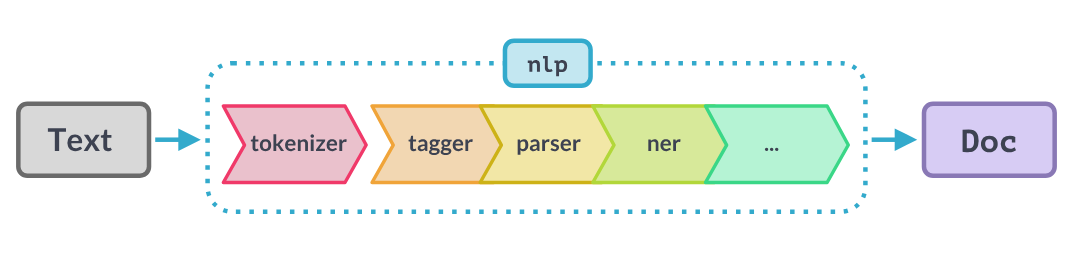

In [5]:
import spacy

# Load spaCy's small English model
nlp = spacy.load('en_core_web_sm')

# Apply the NLP pipeline to the text
doc = nlp(text)

# Extract tokens
tokens_spacy = [token.text for token in doc]
print(tokens_spacy)

['At', 'the', 'annual', 'global', 'summit', 'in', 'Paris', ',', '\n    ', 'French', 'President', 'Emmanuel', 'Macron', 'and', '\n    ', 'German', 'Chancellor', 'Angela', 'Merkel', '\n    ', 'met', 'with', 'executives', 'from', 'Google', ',', '\n    ', 'Amazon', ',', 'and', 'Facebook', 'to', 'discuss', 'innovations', '\n    ', 'in', 'artificial', 'intelligence', '.']


## C. Comparing Tokenization Approaches
Let us compare the outputs of `split()` and `spaCy` tokenization. Observe how each handles punctuation, contractions, and special cases.

In [6]:
# Print comparison
print("Split():", tokens_split)
print("spaCy:", tokens_spacy)

Split(): ['At', 'the', 'annual', 'global', 'summit', 'in', 'Paris,', 'French', 'President', 'Emmanuel', 'Macron', 'and', 'German', 'Chancellor', 'Angela', 'Merkel', 'met', 'with', 'executives', 'from', 'Google,', 'Amazon,', 'and', 'Facebook', 'to', 'discuss', 'innovations', 'in', 'artificial', 'intelligence.']
spaCy: ['At', 'the', 'annual', 'global', 'summit', 'in', 'Paris', ',', '\n    ', 'French', 'President', 'Emmanuel', 'Macron', 'and', '\n    ', 'German', 'Chancellor', 'Angela', 'Merkel', '\n    ', 'met', 'with', 'executives', 'from', 'Google', ',', '\n    ', 'Amazon', ',', 'and', 'Facebook', 'to', 'discuss', 'innovations', '\n    ', 'in', 'artificial', 'intelligence', '.']


## D. Part of Speech Tagging with spaCy
[Part of Speech (POS) tagging](https://spacy.io/usage/linguistic-features) is the process of labeling each token in a sentence with its grammatical category. spaCy makes this easy by providing access to the `pos_` and `tag_` attributes of each token.

In [12]:
for token in doc:
    print(f"{token.text} - {token.lemma_}: {token.pos_}")

# Example explanation:
# - `lemma_` : The base/dictionary form of a word.
# - `pos_`: Coarse-grained part of speech, e.g., NOUN, VERB, etc.

At - at: ADP
the - the: DET
annual - annual: ADJ
global - global: ADJ
summit - summit: NOUN
in - in: ADP
Paris - Paris: PROPN
, - ,: PUNCT

     - 
    : SPACE
French - french: ADJ
President - President: PROPN
Emmanuel - Emmanuel: PROPN
Macron - Macron: PROPN
and - and: CCONJ

     - 
    : SPACE
German - German: PROPN
Chancellor - Chancellor: PROPN
Angela - Angela: PROPN
Merkel - Merkel: PROPN

     - 
    : SPACE
met - meet: VERB
with - with: ADP
executives - executive: NOUN
from - from: ADP
Google - Google: PROPN
, - ,: PUNCT

     - 
    : SPACE
Amazon - Amazon: PROPN
, - ,: PUNCT
and - and: CCONJ
Facebook - Facebook: PROPN
to - to: PART
discuss - discuss: VERB
innovations - innovation: NOUN

     - 
    : SPACE
in - in: ADP
artificial - artificial: ADJ
intelligence - intelligence: NOUN
. - .: PUNCT


## F. Named Entity Recognition with spaCy
[Named Entity Recognition (NER)](https://www.geeksforgeeks.org/python-named-entity-recognition-ner-using-spacy/) involves identifying proper nouns and entities in the text, such as people, organizations, dates, and locations. spaCy provides a pre-trained NER pipeline that can extract entities with their types.

In [13]:
# Display named entities in the text
for ent in doc.ents:
    print(f"{ent.text}: {ent.label_} ({spacy.explain(ent.label_)})")

# Example explanation:
# - `text`: The entity as it appears in the text.
# - `label_`: The type of the entity, e.g., PERSON, GPE (Geo-Political Entity), DATE.

annual: DATE (Absolute or relative dates or periods)
Paris: GPE (Countries, cities, states)
French: NORP (Nationalities or religious or political groups)
Emmanuel Macron: PERSON (People, including fictional)
German: NORP (Nationalities or religious or political groups)
Angela Merkel: PERSON (People, including fictional)
Google: ORG (Companies, agencies, institutions, etc.)
Amazon: ORG (Companies, agencies, institutions, etc.)


### Visualizing Entities
spaCy also allows us to visualize entities in text using the `displacy` module.

In [9]:
from spacy import displacy

# Render the named entities
displacy.render(doc, style='ent', jupyter=True)
# Note: Run this in a Jupyter Notebook to see the visualization.